In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("PatientInfo.csv")
df

patient_id  global_num     sex  birth_year  age country province  \
0     1000000001         2.0    male      1964.0  50s   Korea    Seoul   
1     1000000002         5.0    male      1987.0  30s   Korea    Seoul   
2     1000000003         6.0    male      1964.0  50s   Korea    Seoul   
3     1000000004         7.0    male      1991.0  20s   Korea    Seoul   
4     1000000005         9.0  female      1992.0  20s   Korea    Seoul   
...          ...         ...     ...         ...  ...     ...      ...   
3321  7000000009      9651.0  female         NaN  20s   Korea  Jeju-do   
3322  7000000010         NaN  female         NaN  20s   Korea  Jeju-do   
3323  7000000011         NaN    male         NaN  30s   Korea  Jeju-do   
3324  7000000012         NaN  female         NaN  20s   Korea  Jeju-do   
3325  7000000013         NaN  female         NaN  10s   China  Jeju-do   

             city disease        infection_case  infection_order  \
0      Gangseo-gu     NaN       overseas inflow              1.0   
1     Jungnang-gu     NaN       overseas inflow              1.0   
2       Jongno-gu     NaN  contact with patient              2.0   
3         Mapo-gu     NaN       overseas inflow              1.0   
4     Seongbuk-gu     NaN  contact with patient              2.0   
...           ...     ...                   ...              ...   
3321      Jeju-do     NaN       overseas inflow              NaN   
3322      Jeju-do     NaN       overseas inflow              NaN   
3323      Jeju-do     NaN  contact with patient              NaN   
3324      Jeju-do     NaN       overseas inflow              NaN   
3325      Jeju-do     NaN       overseas inflow              NaN   

       infected_by  contact_number symptom_onset_date confirmed_date  \
0              NaN            75.0         2020-01-22     2020-01-23   
1              NaN            31.0                NaN     2020-01-30   
2     2.002000e+09            17.0                NaN     2020-01-30   
3              NaN             9.0         2020-01-26     2020-01-30   
4     1.000000e+09             2.0                NaN     2020-01-31   
...            ...             ...                ...            ...   
3321           NaN            14.0                NaN     2020-03-29   
3322           NaN            18.0                NaN     2020-04-03   
3323  7.000000e+09             5.0                NaN     2020-04-03   
3324           NaN             9.0                NaN     2020-04-03   
3325           NaN             6.0                NaN     2020-04-14   

     released_date deceased_date     state  
0       2020-02-05           NaN  released  
1       2020-03-02           NaN  released  
2       2020-02-19           NaN  released  
3       2020-02-15           NaN  released  
4       2020-02-24           NaN  released  
...            ...           ...       ...  
3321           NaN           NaN  isolated  
3322           NaN           NaN  isolated  
3323           NaN           NaN  isolated  
3324           NaN           NaN  isolated  
3325           NaN           NaN  isolated  

[3326 rows x 18 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3326 non-null   int64  
 1   global_num          2237 non-null   float64
 2   sex                 3260 non-null   object 
 3   birth_year          2889 non-null   float64
 4   age                 3252 non-null   object 
 5   country             3326 non-null   object 
 6   province            3326 non-null   object 
 7   city                3247 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2559 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         806 non-null    float64
 12  contact_number      614 non-null    float64
 13  symptom_onset_date  471 non-null    object 
 14  confirmed_date      3323 non-null   object 
 15  released_date       1218 non-null   object 
 16  deceas

In [ ]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display the results
print(null_counts)

patient_id               0
global_num            1089
sex                     66
birth_year             437
age                     74
country                  0
province                 0
city                    79
disease               3308
infection_case         767
infection_order       3295
infected_by           2520
contact_number        2712
symptom_onset_date    2855
confirmed_date           3
released_date         2108
deceased_date         3266
state                    0
dtype: int64


In [ ]:
df['infected_by'] = pd.to_numeric(df['infected_by'], errors='coerce').fillna(0).astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3326 non-null   int64  
 1   global_num          2237 non-null   float64
 2   sex                 3260 non-null   object 
 3   birth_year          2889 non-null   float64
 4   age                 3252 non-null   object 
 5   country             3326 non-null   object 
 6   province            3326 non-null   object 
 7   city                3247 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2559 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         3326 non-null   int64  
 12  contact_number      614 non-null    float64
 13  symptom_onset_date  471 non-null    object 
 14  confirmed_date      3323 non-null   object 
 15  released_date       1218 non-null   object 
 16  deceas

In [ ]:
a=[]
for i in df['infected_by']:
  if not df['patient_id'].isin([i]).any():
    a.append(i)
unique_values = list(set(a))
print(len(unique_values))
print(unique_values)

4
[0, 2002000001, 6100000384, 2017000005]


In [ ]:
import networkx as nx
all_nodes = list(set(df['patient_id'].unique()) | set(df.loc[df['infected_by'] != 0, 'infected_by'].unique()))
G = nx.DiGraph()
G.add_nodes_from(all_nodes)


for index, row in df.iterrows():
    infected_by = row['infected_by']
    patient_id = row['patient_id']
    if infected_by != 0:
        G.add_edge(infected_by, patient_id)

print("number of nodes: ",G.number_of_nodes())


number of nodes:  3329


None


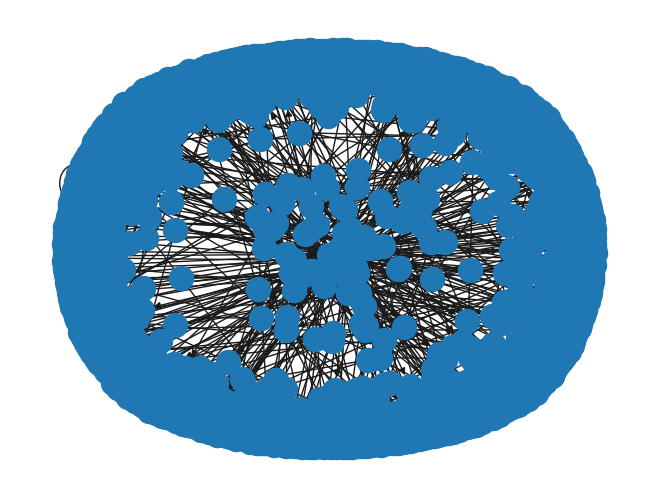

In [ ]:
print(nx.draw(G, with_labels=False, pos=nx.spring_layout(G)))

None


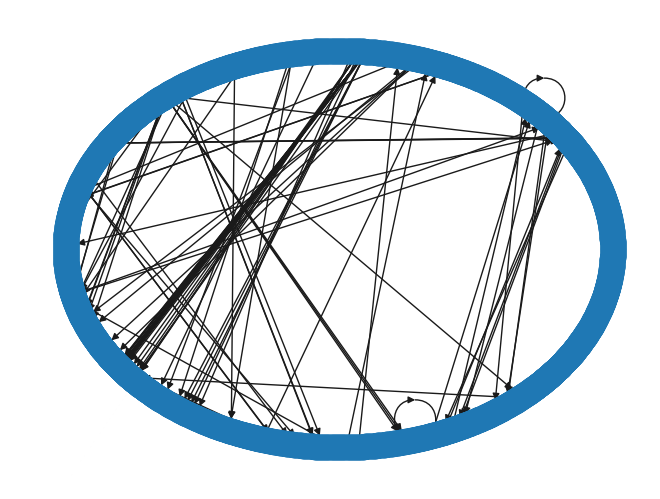

In [ ]:
print(nx.draw(G, with_labels=False, pos=nx.circular_layout(G)))

None


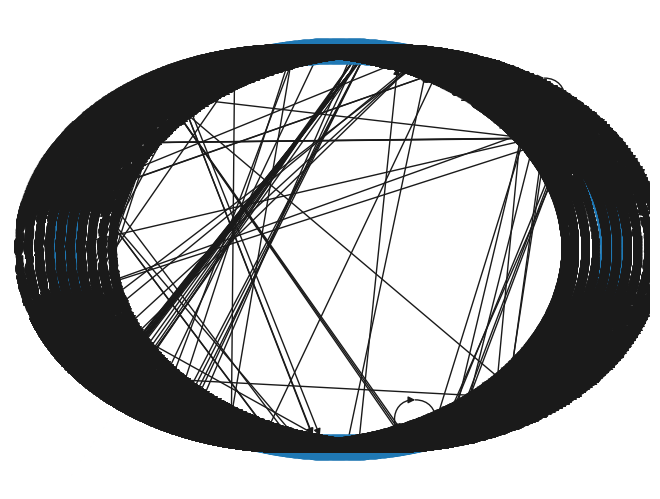

In [ ]:
print(nx.draw(G, with_labels=True, pos=nx.circular_layout(G)))

Centrality Measures for the connected nodes

In [ ]:
import networkx as nx
import pandas as pd

G_connected = G.copy()
G_connected.remove_nodes_from(list(nx.isolates(G)))

degree_centrality = nx.degree_centrality(G_connected)
betweenness_centrality = nx.betweenness_centrality(G_connected)
closeness_centrality = nx.closeness_centrality(G_connected)
eigenvector_centrality = nx.eigenvector_centrality(G_connected)

centrality_df = pd.DataFrame({
    'Patient ID': list(G_connected.nodes()),
    'Degree Centrality': list(degree_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values()),
    'Eigenvector Centrality': list(eigenvector_centrality.values())
})

print("Number of connected nodes: ",len(centrality_df))
print("Isolated nodes: ",len(list(nx.isolates(G))))
print(centrality_df)

Number of connected nodes:  1031
Isolated nodes:  2298
      Patient ID  Degree Centrality  Betweenness Centrality  \
0     6015000019           0.000971            0.000000e+00   
1     7000000009           0.000971            0.000000e+00   
2     7000000011           0.000971            0.000000e+00   
3     6100000008           0.000971            0.000000e+00   
4     6100000015           0.000971            0.000000e+00   
...          ...                ...                     ...   
1026  6001000001           0.000971            0.000000e+00   
1027  1100000098           0.000971            0.000000e+00   
1028  1100000099           0.000971            0.000000e+00   
1029  1100000100           0.001942            9.435119e-07   
1030  1100000101           0.000971            0.000000e+00   

      Closeness Centrality  Eigenvector Centrality  
0                 0.000971            1.483953e-08  
1                 0.000000            5.117079e-10  
2                 0.000971   

In [ ]:
for centrality_measure in ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Eigenvector Centrality']:
    print(f"\nTop 10 nodes by {centrality_measure}:")
    top_10 = centrality_df.sort_values(by=centrality_measure, ascending=False).head(10)
    print(top_10[['Patient ID', centrality_measure]])


Top 10 nodes by Degree Centrality:
     Patient ID  Degree Centrality
644  2000000205           0.050485
80   4100000008           0.026214
615  2000000167           0.024272
78   4100000006           0.021359
727  2000000309           0.020388
247  1000000125           0.017476
840  2000000508           0.016505
362  1200000031           0.016505
829  2000000476           0.014563
589  2000000125           0.010680

Top 10 nodes by Betweenness Centrality:
     Patient ID  Betweenness Centrality
644  2000000205                0.000056
78   4100000006                0.000031
615  2000000167                0.000025
33   6016000019                0.000020
20   6016000009                0.000019
24   6016000012                0.000017
129  4100000059                0.000017
48   6016000028                0.000015
575  2000000104                0.000011
205  1000000017                0.000011

Top 10 nodes by Closeness Centrality:
     Patient ID  Closeness Centrality
55   6016000035      

In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore", category=FutureWarning)

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


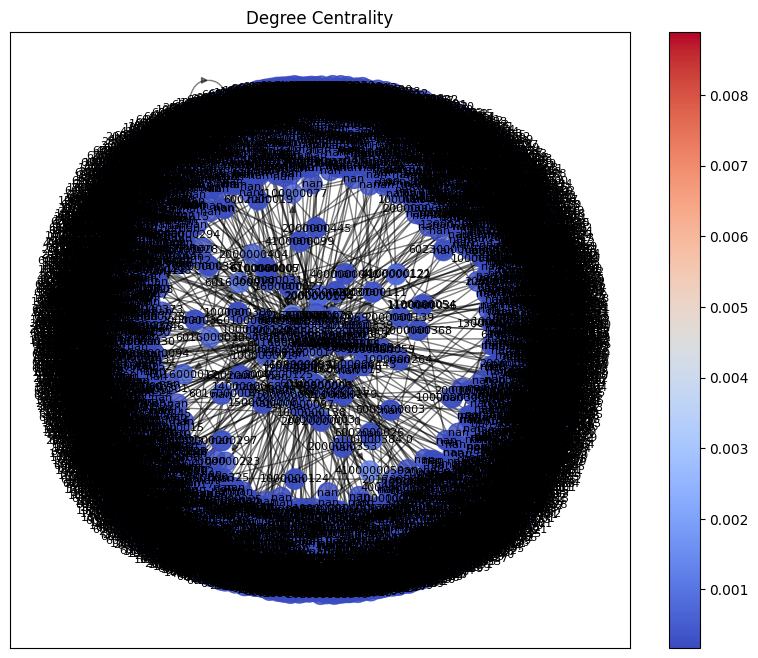

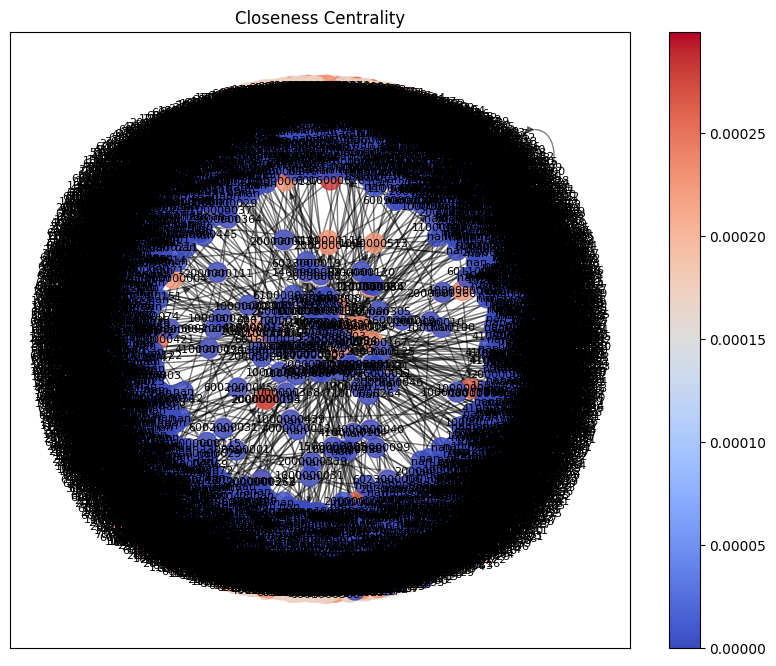

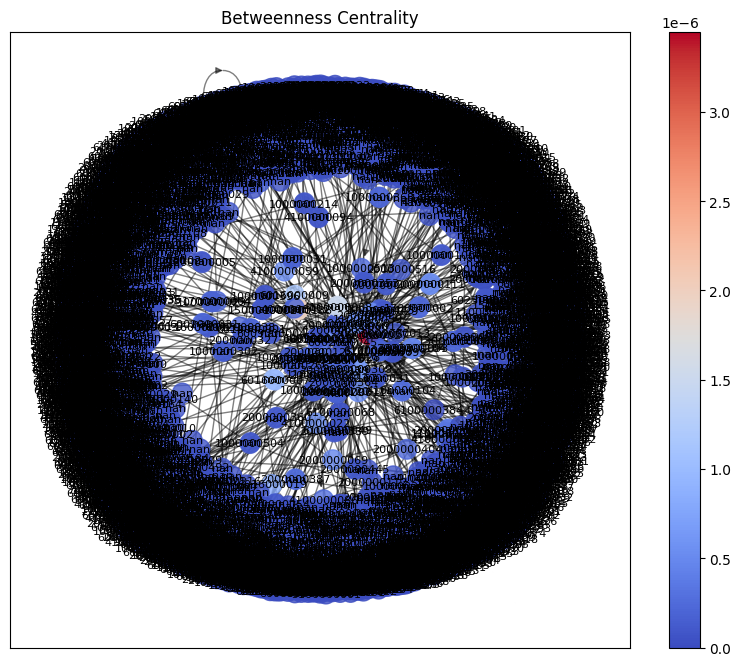

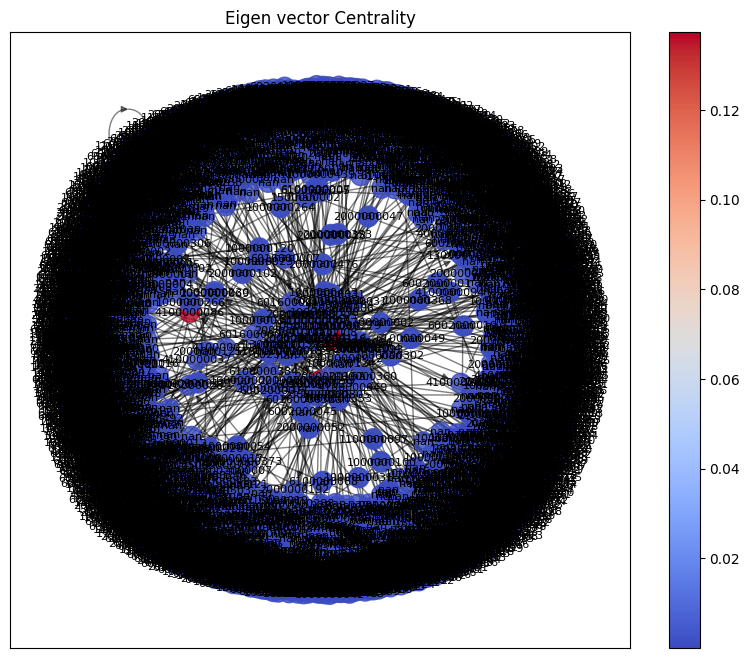

In [ ]:
def visualize_centrality(G, centrality, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    pos = nx.spring_layout(G)

    centrality_values = list(centrality.values())
    norm = plt.Normalize(min(centrality_values), max(centrality_values))

    node_colors = sns.color_palette("coolwarm", as_cmap=True)(norm(centrality_values))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=200, cmap='coolwarm', alpha=0.8, ax=ax)

    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

    nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', ax=ax)

    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax)

    plt.title(title)
    plt.show()

visualize_centrality(G_connected, degree_centrality, "Degree Centrality")
visualize_centrality(G_connected, closeness_centrality, "Closeness Centrality")
visualize_centrality(G_connected, betweenness_centrality, "Betweenness Centrality")
visualize_centrality(G_connected, eigenvector_centrality, "Eigen vector Centrality")

City Centrality

In [ ]:
import operator
infection_data = df[['province', 'infected_by']]
infection_data = infection_data[infection_data['infected_by'] != 0]

G_province = nx.DiGraph()

for _, row in infection_data.iterrows():
    patient_province = row['province']
    infector_id = row['infected_by']

    infector_province = df.loc[df['patient_id'] == infector_id, 'province'].values

    if len(infector_province) > 0:
        if G_province.has_edge(infector_province[0], patient_province):
            G_province[infector_province[0]][patient_province]['weight'] += 1
        else:

            G_province.add_edge(infector_province[0], patient_province, weight=1)

in_degree_centrality = nx.in_degree_centrality(G_province)
out_degree_centrality = nx.out_degree_centrality(G_province)
betweenness_centrality = nx.betweenness_centrality(G_province)
closeness_centrality = nx.closeness_centrality(G_province)
eigenvector_centrality = nx.eigenvector_centrality(G_province)

centrality_df_province = pd.DataFrame({
    'age': list(G_province.nodes),
    'in_degree_centrality': [in_degree_centrality[node] for node in G_province.nodes],
    'out_degree_centrality': [out_degree_centrality[node] for node in G_province.nodes],
    'betweenness_centrality': [betweenness_centrality[node] for node in G_province.nodes],
    'closeness_centrality': [closeness_centrality[node] for node in G_province.nodes],
    'eigenvector_centrality': [eigenvector_centrality[node] for node in G_province.nodes]
})

print("Total number of nodes: ",  G_province.number_of_nodes())
sorted_edges = sorted(G_province.edges(data=True), key=lambda t: t[2].get('weight', 1), reverse=True)

for u, v, data in sorted_edges[:5]:
    print(f"Edge: {u} -> {v}, Weight: {data['weight']}")

print()
print(centrality_df_province)

Total number of nodes:  16
Edge: Gyeonggi-do -> Gyeonggi-do, Weight: 296
Edge: Seoul -> Seoul, Weight: 115
Edge: Chungcheongnam-do -> Chungcheongnam-do, Weight: 110
Edge: Gyeongsangbuk-do -> Gyeongsangbuk-do, Weight: 90
Edge: Seoul -> Gyeonggi-do, Weight: 38

                  age  in_degree_centrality  out_degree_centrality  \
0               Seoul              0.133333               0.133333   
1             Daejeon              0.266667               0.133333   
2               Busan              0.133333               0.133333   
3    Gyeongsangnam-do              0.200000               0.200000   
4               Daegu              0.066667               0.400000   
5             Gwangju              0.066667               0.133333   
6             Incheon              0.066667               0.133333   
7   Chungcheongnam-do              0.200000               0.133333   
8        Jeollabuk-do              0.066667               0.133333   
9               Ulsan              0.200

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


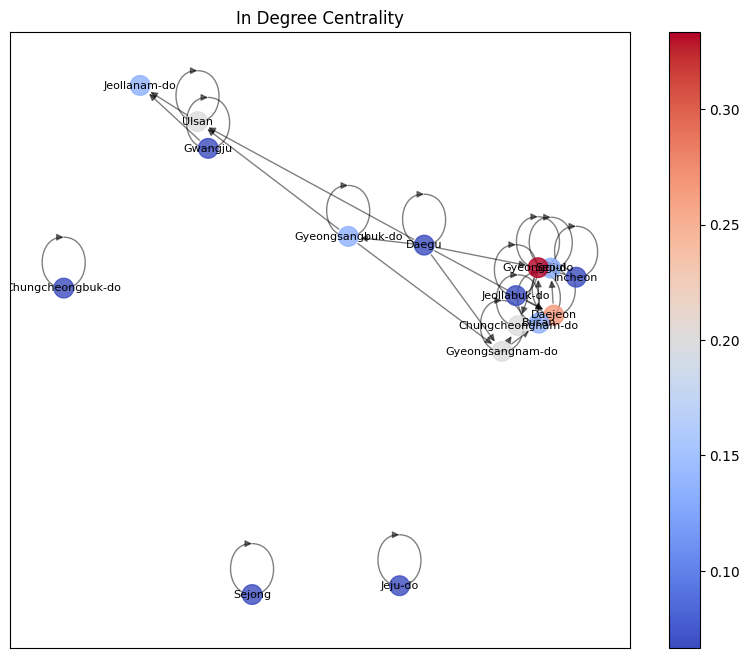

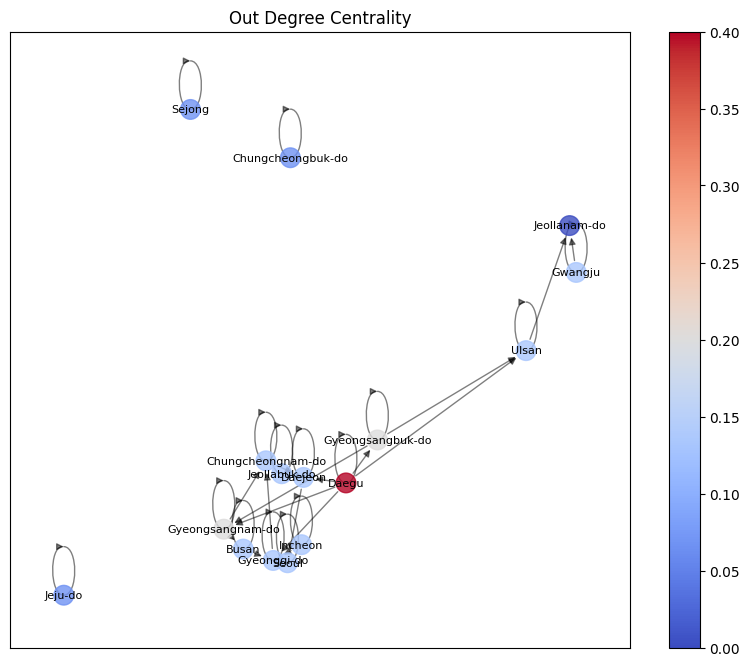

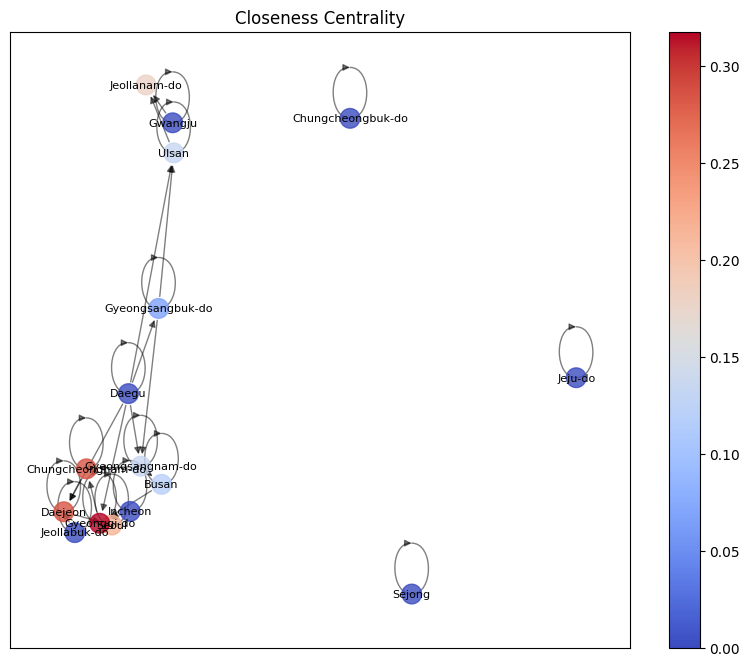

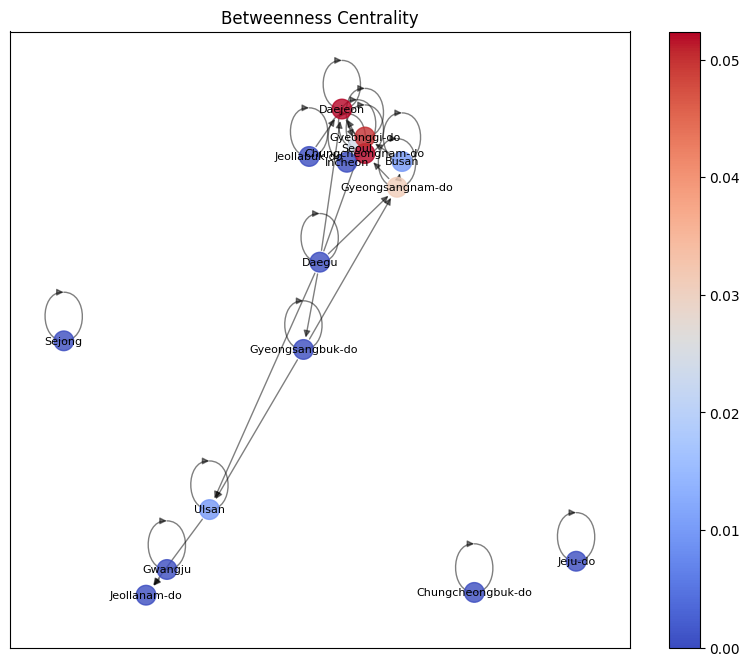

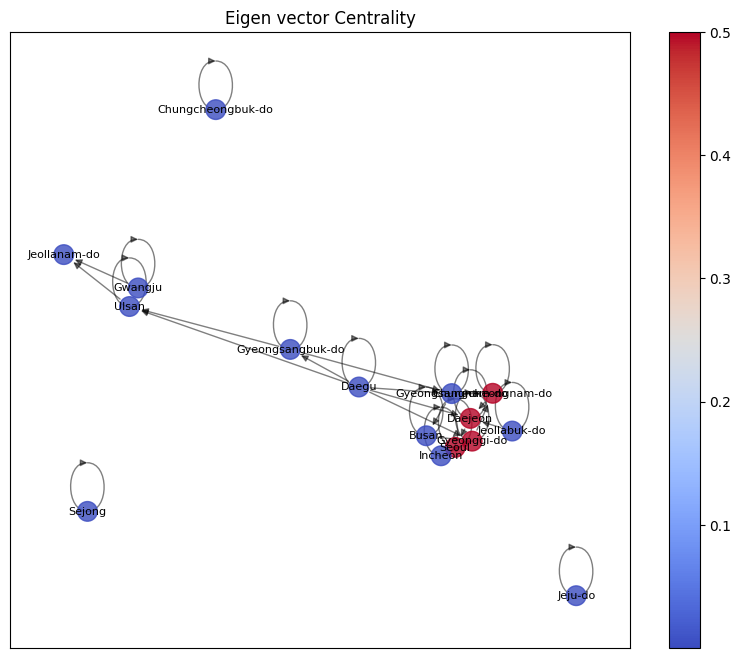

In [ ]:
def visualize_centrality(G, centrality, title):
    fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and an axes
    pos = nx.spring_layout(G)
    centrality_values = list(centrality.values())
    norm = plt.Normalize(min(centrality_values), max(centrality_values))
    node_colors = sns.color_palette("coolwarm", as_cmap=True)(norm(centrality_values))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=200, cmap='coolwarm', alpha=0.8, ax=ax)  # Draw nodes on the axes

    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)  # Draw edges on the axes
    nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', ax=ax)  # Draw labels on the axes
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax)  # Add colorbar to the axes
    plt.title(title)
    plt.show()

visualize_centrality(G_province, in_degree_centrality, "In Degree Centrality")
visualize_centrality(G_province, out_degree_centrality, "Out Degree Centrality")
visualize_centrality(G_province, closeness_centrality, "Closeness Centrality")
visualize_centrality(G_province, betweenness_centrality, "Betweenness Centrality")
visualize_centrality(G_province, eigenvector_centrality, "Eigen vector Centrality")


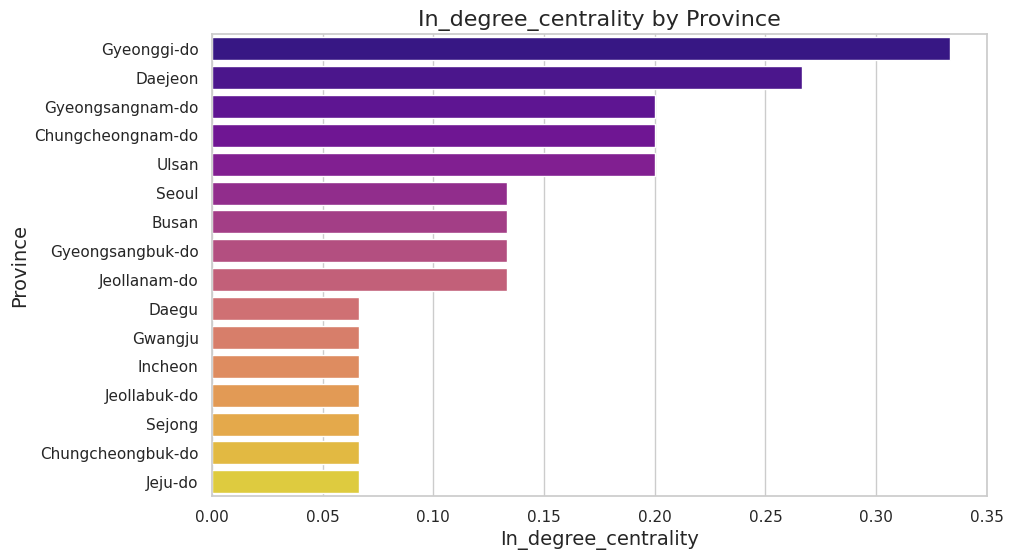

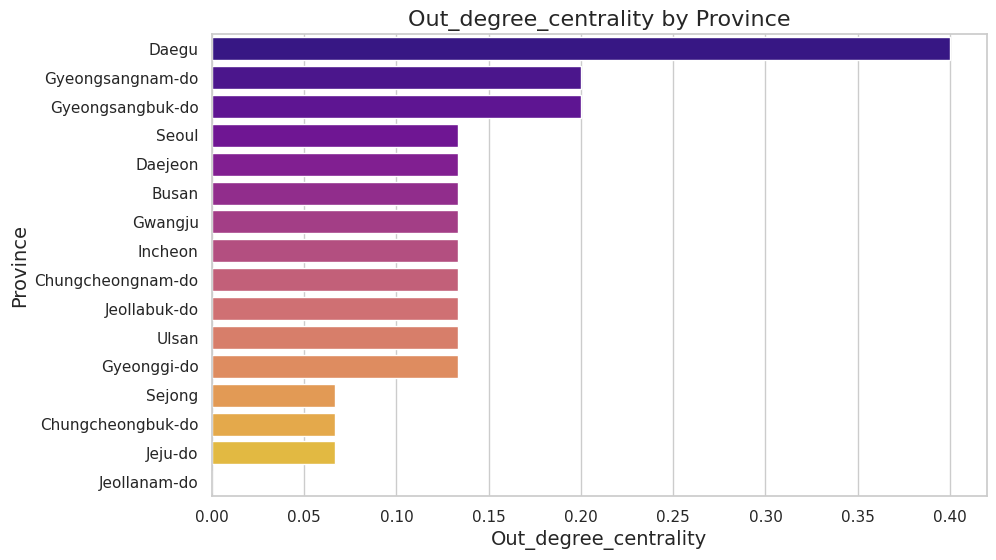

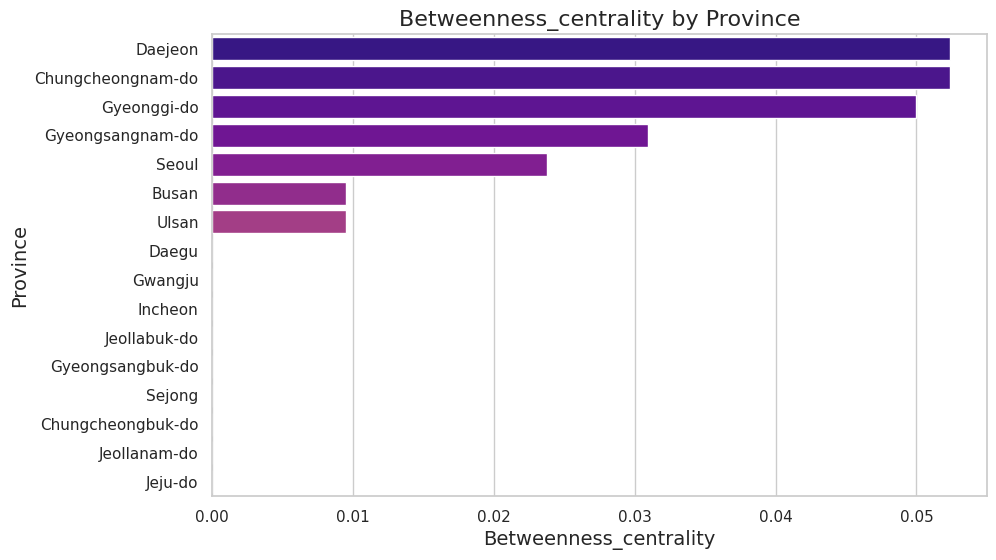

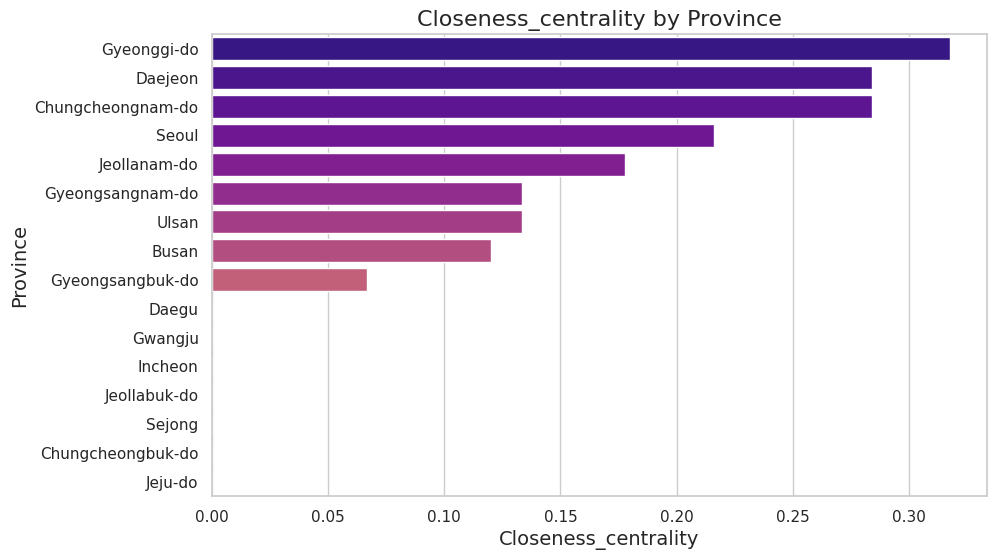

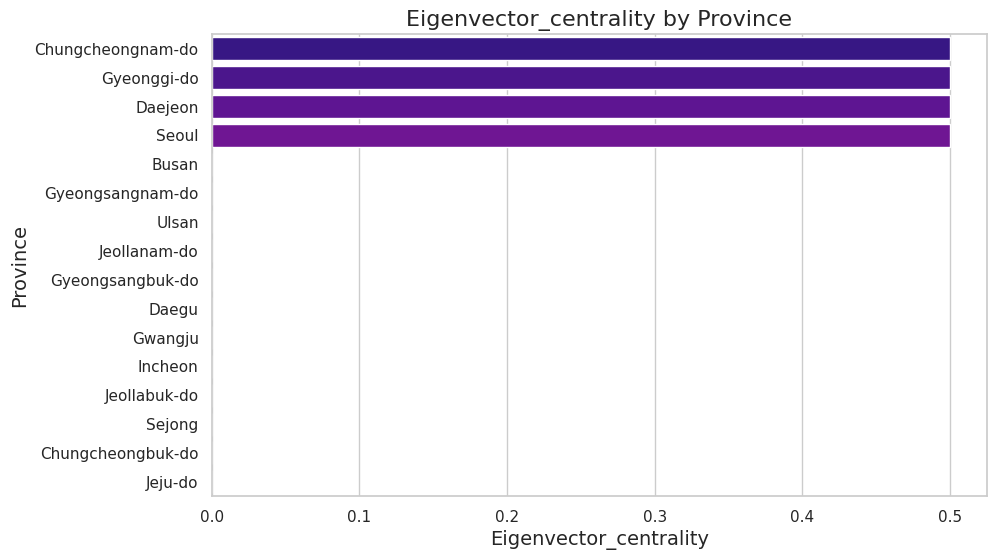

In [ ]:
sns.set(style="whitegrid")

def plot_centrality_age(centrality_df, metric):
    plt.figure(figsize=(10, 6))
    sorted_df = centrality_df.sort_values(by=metric, ascending=False)
    sns.barplot(x=metric, y='age', data=sorted_df, palette="plasma")
    plt.title(f'{metric.capitalize()} by Province', fontsize=16)
    plt.xlabel(f'{metric.capitalize()}', fontsize=14)
    plt.ylabel('Province', fontsize=14)
    plt.show()

for metric in ['in_degree_centrality', 'out_degree_centrality','betweenness_centrality', 'closeness_centrality', 'eigenvector_centrality']:
    plot_centrality_age(centrality_df_province, metric)

In [ ]:
infection_data = df[['age', 'infected_by']]
infection_data = infection_data[infection_data['infected_by'] != 0]
infection_data = infection_data.dropna(subset=['age'])
G_age = nx.DiGraph()
for _, row in infection_data.iterrows():
    patient_age = row['age']
    infector_id = row['infected_by']
    infector_age = df.loc[df['patient_id'] == infector_id, 'age'].values

    if len(infector_age) > 0:
        if G_age.has_edge(infector_age[0], patient_age):
            G_age[infector_age[0]][patient_age]['weight'] += 1
        else:
            G_age.add_edge(infector_age[0], patient_age, weight=1)


in_degree_centrality = nx.in_degree_centrality(G_age)
out_degree_centrality = nx.out_degree_centrality(G_age)
betweenness_centrality = nx.betweenness_centrality(G_age)
closeness_centrality = nx.closeness_centrality(G_age)
eigenvector_centrality = nx.eigenvector_centrality_numpy(G_age)

centrality_df_age = pd.DataFrame({
    'age': list(G_age.nodes),
    'in_degree_centrality': [in_degree_centrality[node] for node in G_age.nodes],
    'out_degree_centrality': [out_degree_centrality[node] for node in G_age.nodes],
    'betweenness_centrality': [betweenness_centrality[node] for node in G_age.nodes],
    'closeness_centrality': [closeness_centrality[node] for node in G_age.nodes],
    'eigenvector_centrality': [eigenvector_centrality[node] for node in G_age.nodes]
})

print("Total number of nodes: ",  G_age.number_of_nodes())
sorted_edges = sorted(G_age.edges(data=True), key=lambda t: t[2].get('weight', 1), reverse=True)

for u, v, data in sorted_edges[:5]:
    print(f"Edge: {u} -> {v}, Weight: {data['weight']}")

print()
print(centrality_df_age)



Total number of nodes:  10
Edge: 40s -> 40s, Weight: 78
Edge: 50s -> 50s, Weight: 40
Edge: 20s -> 20s, Weight: 39
Edge: 60s -> 60s, Weight: 39
Edge: 40s -> 50s, Weight: 35

   age  in_degree_centrality  out_degree_centrality  betweenness_centrality  \
0  30s              1.000000               0.888889                0.064815   
1  20s              0.888889               1.000000                0.041204   
2  50s              1.000000               0.888889                0.043519   
3  60s              1.000000               0.888889                0.043519   
4  70s              0.888889               0.888889                0.013426   
5  80s              0.777778               0.888889                0.134259   
6  40s              1.000000               1.000000                0.103704   
7   0s              0.444444               0.333333                0.000000   
8  10s              0.777778               0.777778                0.000000   
9  90s              0.111111         

In [ ]:
age_group_counts = df['age'].value_counts().sort_index()
print(age_group_counts)

age
0s       53
100s      1
10s     146
20s     790
30s     425
40s     453
50s     589
60s     398
70s     197
80s     155
90s      45
Name: count, dtype: int64


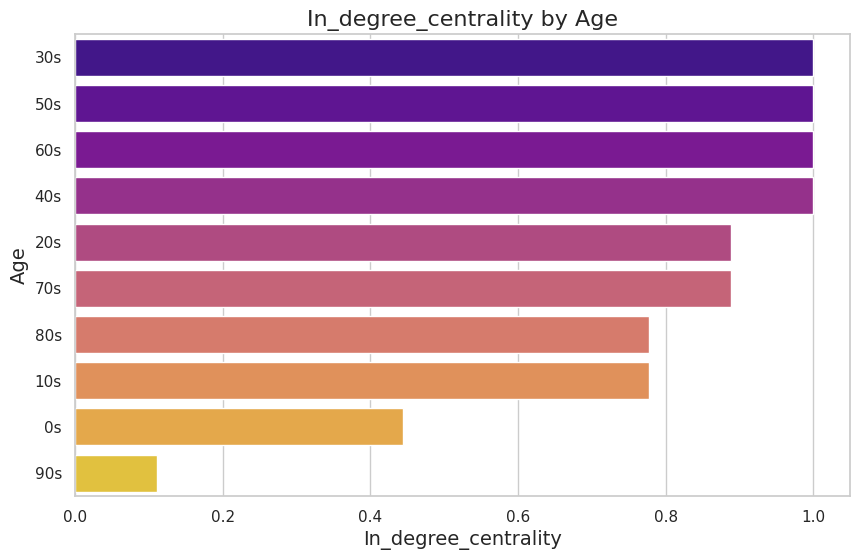

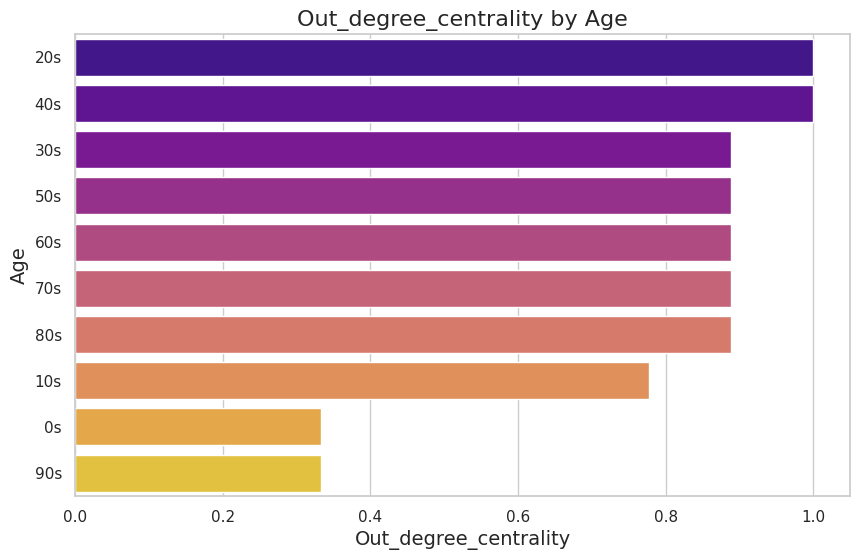

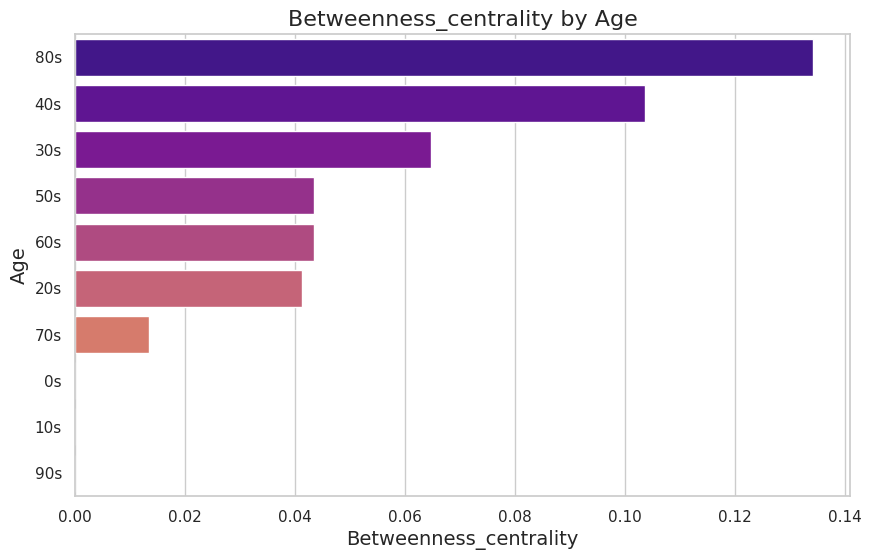

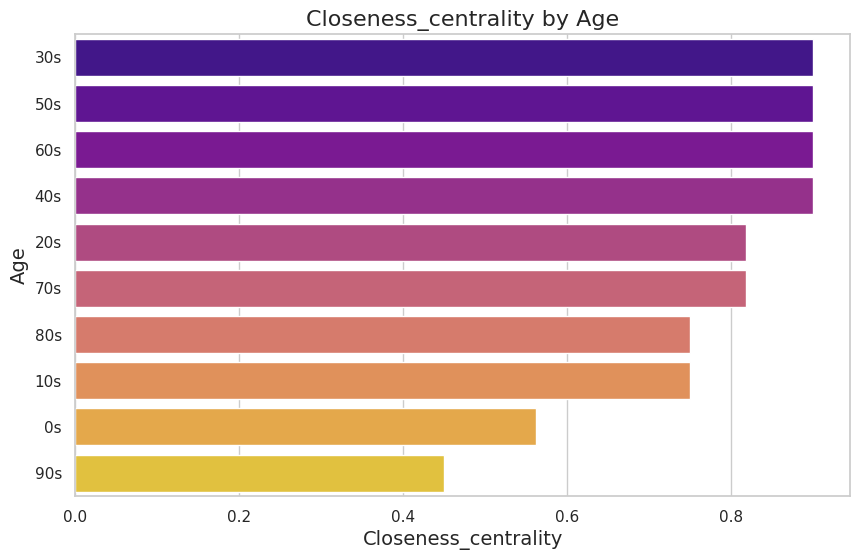

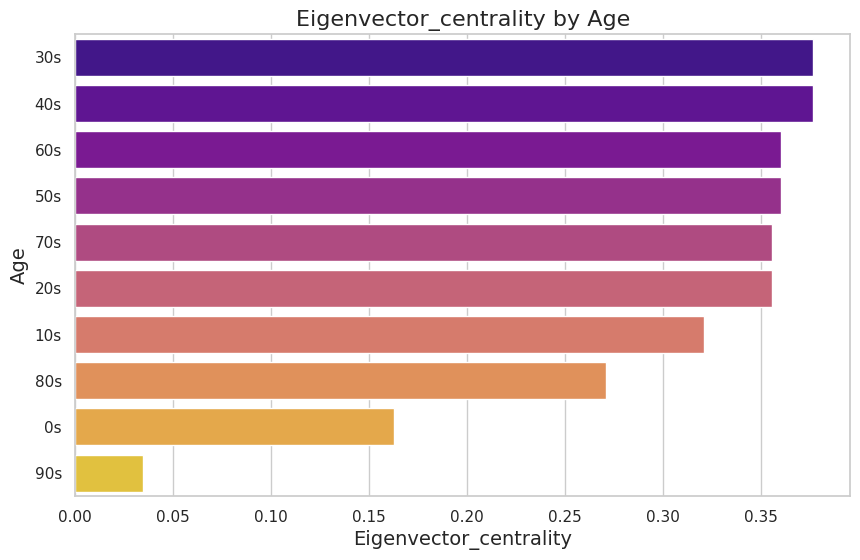

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

def plot_centrality_age(centrality_df, metric):
    plt.figure(figsize=(10, 6))
    sorted_df = centrality_df.sort_values(by=metric, ascending=False)
    sns.barplot(x=metric, y='age', data=sorted_df, palette="plasma")
    plt.title(f'{metric.capitalize()} by Age', fontsize=16)
    plt.xlabel(f'{metric.capitalize()}', fontsize=14)
    plt.ylabel('Age', fontsize=14)
    plt.show()

for metric in ['in_degree_centrality', 'out_degree_centrality','betweenness_centrality', 'closeness_centrality', 'eigenvector_centrality']:
    plot_centrality_age(centrality_df_age, metric)

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


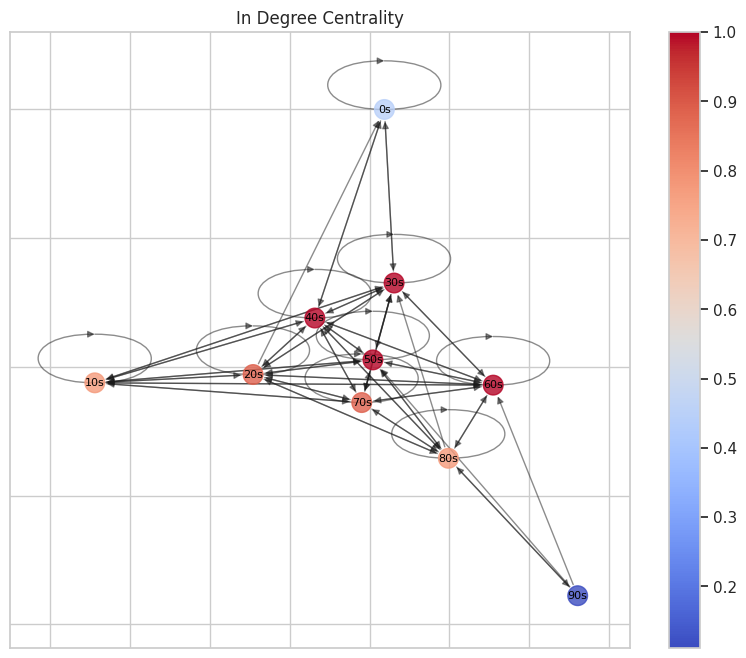

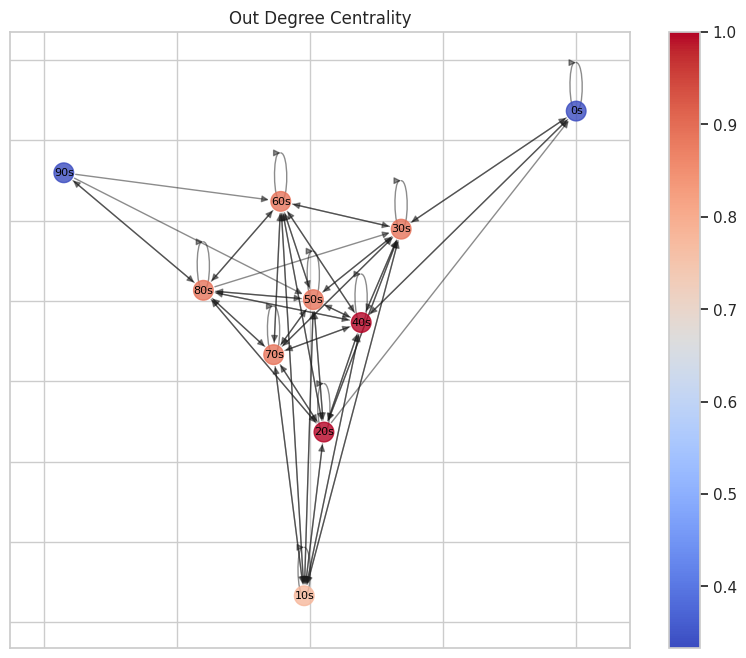

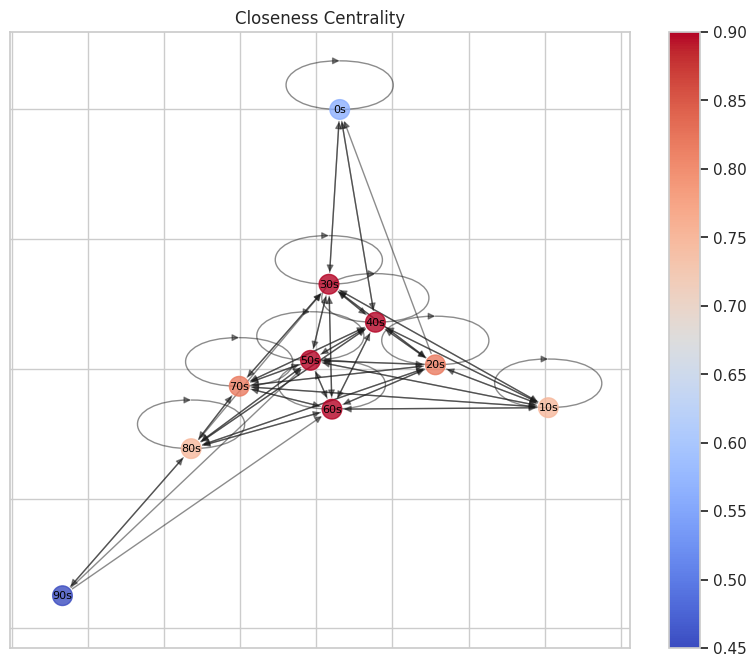

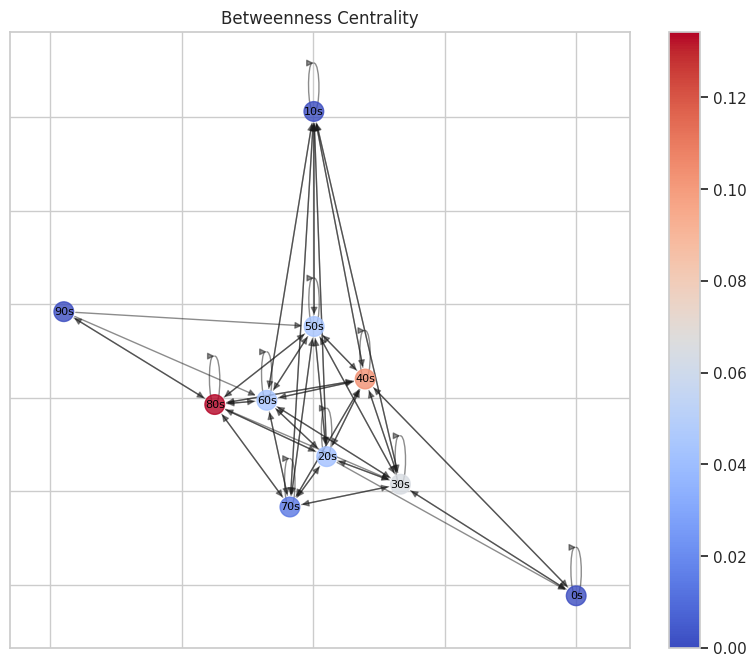

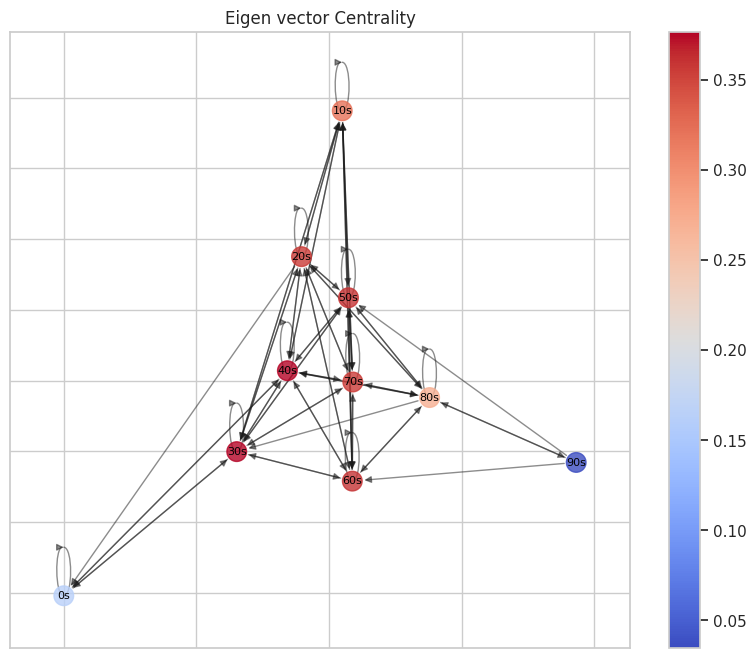

In [ ]:
def visualize_centrality(G, centrality, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    pos = nx.spring_layout(G)
    centrality_values = list(centrality.values())
    norm = plt.Normalize(min(centrality_values), max(centrality_values))
    node_colors = sns.color_palette("coolwarm", as_cmap=True)(norm(centrality_values))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=200, cmap='coolwarm', alpha=0.8, ax=ax)
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', ax=ax)
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax)
    plt.title(title)
    plt.show()

visualize_centrality(G_age, in_degree_centrality, "In Degree Centrality")
visualize_centrality(G_age, out_degree_centrality, "Out Degree Centrality")
visualize_centrality(G_age, closeness_centrality, "Closeness Centrality")
visualize_centrality(G_age, betweenness_centrality, "Betweenness Centrality")
visualize_centrality(G_age, eigenvector_centrality, "Eigen vector Centrality")

In [ ]:
def cascading_analysis(graph):

  infected_by_dict = {}
  for node in graph.nodes():
    infected_by_dict[node] = []
    queue = [node]
    visited = set()
    while queue:
      current_node = queue.pop(0)
      if current_node not in visited:
        visited.add(current_node)
        for neighbor in graph.successors(current_node):
          if neighbor not in visited:
            infected_by_dict[node].append(neighbor)
            queue.append(neighbor)
  return infected_by_dict

infection_cascades = cascading_analysis(G)
infection_cascades = dict(sorted(infection_cascades.items(), key=lambda item: len(item[1]), reverse=True))


print(infection_cascades)



{1000000138: [2000000188, 2000000197, 2000000205, 2000000211, 2000000212, 2000000351, 2000000217, 2000000218, 2000000219, 2000000220, 2000000221, 2000000222, 2000000223, 2000000224, 2000000225, 2000000226, 2000000227, 2000000228, 2000000229, 2000000230, 2000000233, 2000000234, 2000000235, 2000000236, 2000000237, 2000000238, 2000000239, 2000000240, 2000000241, 2000000242, 2000000246, 2000000247, 2000000248, 2000000249, 2000000250, 2000000251, 2000000252, 2000000253, 2000000254, 2000000255, 2000000256, 2000000257, 2000000258, 2000000259, 2000000260, 2000000261, 2000000270, 2000000283, 2000000286, 2000000287, 2000000358, 2000000361, 2000000470, 2000000471, 2000000484, 2000000494, 2000000514, 2000000295, 2000000325, 2000000276, 2000000266, 2000000285, 2000000292, 2000000272, 2000000293, 2000000340], 2000000205: [2000000217, 2000000218, 2000000219, 2000000220, 2000000221, 2000000222, 2000000223, 2000000224, 2000000225, 2000000226, 2000000227, 2000000228, 2000000229, 2000000230, 2000000233, 

In [ ]:
def cascade_size(G, node):
    return len(nx.descendants(G, node))


def cascade_depth(G, node):
    lengths = nx.single_source_shortest_path_length(G, node)
    return max(lengths.values()) if lengths else 0


cascade_info = []
for node in G.nodes():
    size = cascade_size(G, node)
    depth = cascade_depth(G, node)
    cascade_info.append({'patient_id': node, 'cascade_size': size, 'cascade_depth': depth})

cascade_df = pd.DataFrame(cascade_info)
print(cascade_df.head())


largest_cascades =cascade_df.sort_values(by='cascade_size', ascending=False).head(10)
print("Top 10 patients causing the largest cascades:")
print(largest_cascades)

   patient_id  cascade_size  cascade_depth
0  6001000448             0              0
1  6001000449             0              0
2  6001000450             0              0
3  6001000451             0              0
4  6001000452             0              0
Top 10 patients causing the largest cascades:
      patient_id  cascade_size  cascade_depth
792   1000000138            66              4
2043  2000000205            59              3
501   4100000008            51              3
779   1000000125            48              3
499   4100000006            34              3
500   4100000007            34              4
377   6016000007            33              6
2005  2000000167            27              2
1197  1200000031            23              2
2148  2000000309            22              2


In [ ]:
cascade_info = []
for node in G_province.nodes():
    size = cascade_size(G_province, node)
    depth = cascade_depth(G_province, node)
    cascade_info.append({'patient_id': node, 'cascade_size': size, 'cascade_depth': depth})

cascade_df = pd.DataFrame(cascade_info)
print(cascade_df.head())

largest_cascades = cascade_df.sort_values(by='cascade_size', ascending=False).head(10)
print("Top 10 patients causing the largest cascades:")
print(largest_cascades)

         patient_id  cascade_size  cascade_depth
0             Seoul             3              3
1           Daejeon             3              3
2             Busan             4              4
3  Gyeongsangnam-do             5              3
4             Daegu             9              2
Top 10 patients causing the largest cascades:
           patient_id  cascade_size  cascade_depth
4               Daegu             9              2
10   Gyeongsangbuk-do             8              4
3    Gyeongsangnam-do             5              3
2               Busan             4              4
6             Incheon             4              4
8        Jeollabuk-do             4              4
0               Seoul             3              3
1             Daejeon             3              3
7   Chungcheongnam-do             3              3
12        Gyeonggi-do             3              3


In [ ]:
cascade_info = []
for node in G_age.nodes():
    size = cascade_size(G_age, node)
    depth = cascade_depth(G_age, node)
    cascade_info.append({'patient_id': node, 'cascade_size': size, 'cascade_depth': depth})

cascade_df = pd.DataFrame(cascade_info)
print(cascade_df.head())

largest_cascades = cascade_df.sort_values(by='cascade_size', ascending=False).head(10)
print("Top 10 patients causing the largest cascades:")
print(largest_cascades)

  patient_id  cascade_size  cascade_depth
0        30s             9              3
1        20s             9              2
2        50s             9              2
3        60s             9              2
4        70s             9              2
Top 10 patients causing the largest cascades:
  patient_id  cascade_size  cascade_depth
0        30s             9              3
1        20s             9              2
2        50s             9              2
3        60s             9              2
4        70s             9              2
5        80s             9              2
6        40s             9              2
7         0s             9              3
8        10s             9              3
9        90s             9              3


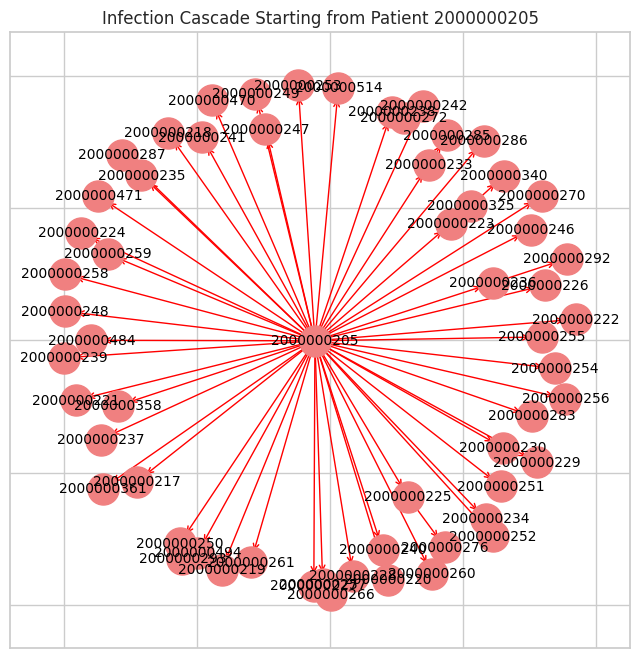

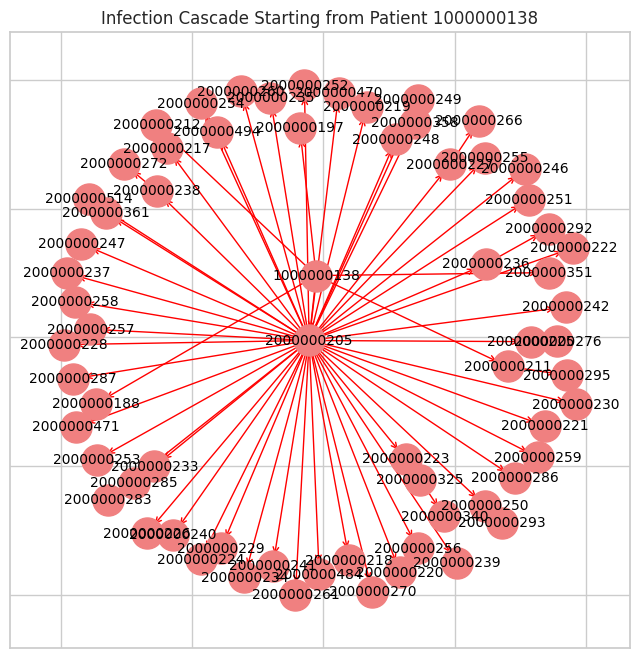

In [ ]:
import matplotlib.pyplot as plt

def visualize_infection_cascade(G, patient_id):

    cascade_nodes = nx.descendants(G, patient_id)
    cascade_nodes.add(patient_id)
    cascade_subgraph = G.subgraph(cascade_nodes)

    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(cascade_subgraph)

    nx.draw_networkx_nodes(cascade_subgraph, pos, node_size=500, node_color='lightcoral')
    nx.draw_networkx_edges(cascade_subgraph, pos, edgelist=cascade_subgraph.edges(), arrowstyle='->', arrowsize=10, edge_color='red')
    nx.draw_networkx_labels(cascade_subgraph, pos, font_size=10, font_color="black")

    plt.title(f"Infection Cascade Starting from Patient {patient_id}")
    plt.show()

visualize_infection_cascade(G,2000000205)
visualize_infection_cascade(G,1000000138)
